In [1]:
!pip install tweepy


    100% |████████████████████████████████| 286kB 8.7MB/s 
  Running setup.py bdist_wheel for PySocks ... - done
  Stored in directory: /root/.cache/pip/wheels/22/5c/b5/12e0dfdfa85bea67b23628b6425fae715c687e947a45ee3df9
Successfully built PySocks


In [2]:
!pip install textblob

    100% |████████████████████████████████| 645kB 9.0MB/s 


In [3]:
!pip install wordcloud

    100% |████████████████████████████████| 348kB 7.0MB/s 


In [4]:
import os
import numpy as np
import keras
import tensorflow as tf
import tweepy
import pandas as pd
import sys
import re
import matplotlib.pyplot as plt
import string
import seaborn as sns
import math
import nltk
import csv
import sklearn
import plotly.offline as py 
import plotly.graph_objs as go
import datetime
import tweepy
import textblob
import json
from nltk.corpus import stopwords
from matplotlib import pyplot
from wordcloud import WordCloud

Using TensorFlow backend.


In [5]:
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords
      Unzipping corpora/stopwords.zip.

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [6]:
from google.colab import files
uploaded = files.upload()

Saving nba10000.py to nba10000.py


In [0]:
!python nba10000.py > twitter_data.txt

In [0]:
import json
import re
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
tweets_data_path = 'twitter_data.txt'

tweets_data = []
tweets_file = open(tweets_data_path, "r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue

In [10]:
print ('Total Tweets Count:{}'.format(len(tweets_data)))

Total Tweets Count:10001


In [0]:
tweets = pd.DataFrame()
tweets['text'] = map(lambda tweet:tweet['text'] if 'text' in tweet else ' ', tweets_data)
tweets['lang'] = map(lambda tweet: tweet.get('lang', None), tweets_data)

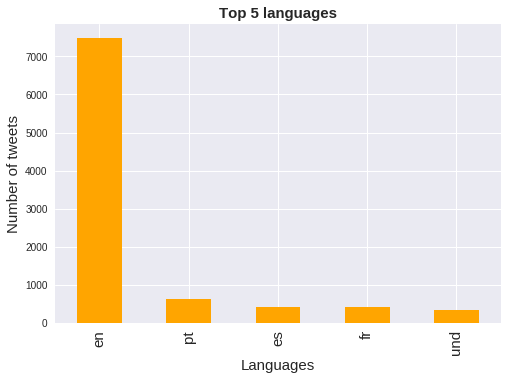

In [12]:
tweets_by_lang = tweets['lang'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Languages', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 languages', fontsize=15, fontweight='bold')
tweets_by_lang[:5].plot(ax=ax, kind='bar', color='orange');
plt.savefig('top_5_langs.jpg',bbox_inches='tight', pad_inches=0.3)

In [0]:
def tweets_contain_keyword(keyword,df):
  """takes keyword and all tweets text return a dataframe of the keyword"""
  key = df[df['text'].str.contains(keyword)].reset_index()
  #key  = key.drop('level_0', axis = 1)
  return key

In [0]:
def tweets_contain_keyword_case_insenstive(keyword,df):
  a=tweets_contain_keyword(keyword.lower(),df)
  b=tweets_contain_keyword(keyword.upper(),df)
  c=tweets_contain_keyword(keyword[0].upper()+keyword[1:].lower(),df)
  frames =[a,b,c]
  result = pd.concat(frames).reset_index()
  #result = result.drop('level_0', axis = 1)
  return result
  

In [0]:
def counts_of_tweets(keyword,df):
  count= tweets_contain_keyword_case_insenstive(keyword,df)['text'].count()
  return count
  

In [0]:
def neutral_case_insenstive(keyword,df):
  df=df.drop('level_0', axis = 1)
  a=tweets_contain_keyword(keyword.lower(),df)
  b=tweets_contain_keyword(keyword.upper(),df)
  c=tweets_contain_keyword(keyword[0].upper()+keyword[1:].lower(),df)
  frames =[a,b,c]
  result = pd.concat(frames)
  return result

In [0]:
 
def counts_comparesion(team1,team2):
  keywords = [team1,team2,'Neutral/Both']
  Team_1 = tweets_contain_keyword_case_insenstive(team1,tweets)
  Team_2 = tweets_contain_keyword_case_insenstive(team2,tweets)
  Neutral =neutral_case_insenstive(team2,Team_1)
  
  count_of_tweets = [counts_of_tweets(team1,tweets),counts_of_tweets(team2,tweets),len(Neutral)]
  
  
  x = list(range(len(keywords)))
  width = 0.8 
  fig, ax = plt.subplots()
  plt.bar(x, count_of_tweets, width, alpha=1, color='g')

# Setting axis labels and ticks
  ax.set_ylabel('Number of tweets', fontsize=15)
  ax.set_title('Total tweets counts', fontsize=10, fontweight='bold')
  ax.set_xticks([p + 0.4 * width for p in x])

  ax.set_xticklabels(keywords)
  plt.grid()
  plt.tight_layout()
  plt.savefig('selected_keywords.jpg',bbox_inches='tight', pad_inches=0.3)




tweets_by_keywords

In [0]:
from textblob import TextBlob
def sentiment(x):
    sentValue = TextBlob(x)
    return sentValue.sentiment.polarity

In [0]:
from __future__ import division

def tweet_sentiment(team):
  Team = tweets_contain_keyword_case_insenstive(team,tweets)
  Team['sentiment'] = Team['text'].apply(sentiment)
  #print( Team['sentiment'])
  Total= len(Team)
  conditions = [
    (Team['sentiment'] > 0 ),
    (Team['sentiment'] < 0),
    (Team['sentiment'] == 0)]
  Team['positive'] = Team['text'][Team['sentiment'] > 0]
  Team['negative'] = Team['text'][Team['sentiment'] < 0]
  Team['neutral'] = Team['text'][Team['sentiment'] == 0]

  print(team +": ")
  print('total tweets: %d'%len( Team))
  
  print('Positive Tweets: %d, percentage: %f' % (Team['positive'].count(), Team['positive'].count()/Total*100) + '%')
  print('Negative Tweets: %d, percentage: %f' % (Team['negative'].count(), Team['negative'].count()/Total*100) + '%')
  print('Neutral Tweets: %d, percentage: %f' % (Team['neutral'].count(), Team['neutral'].count()/Total*100) + '%')
  
  result={}
  result['p']={'count':Team['positive'].count(),'percentage':Team['positive'].count()/Total*100}
  result['na']={'count':Team['negative'].count(),'percentage':Team['negative'].count()/Total*100}
  result['ne']={'count':Team['neutral'].count(),'percentage':Team['neutral'].count()/Total*100}
  
  return result
  
  
  
#tweet_sentiment('Rockets')

In [0]:
#tweet_sentiment("WARRIORS") 

In [0]:
def compare_positive(team1, team2):
  
  keywords=[team1, team2]
  
  dict1 = tweet_sentiment(team1) 
  dict2 = tweet_sentiment(team2) 
  #Positive count
  counts=[dict1['p']['count'],dict2['p']['count']]
  x = [1,2]
  width = 0.6
  fig, ax = plt.subplots()
  plt.bar(x, counts, width, alpha=1, color='g')
  ax.set_ylabel('Number of tweets', fontsize=15)
  ax.set_title('Positive Tweets Counts', fontsize=15, fontweight='bold')
  ax.set_xticks([p + 0.4 * width for p in x])
  ax.set_xticklabels(keywords)
  plt.grid()
  plt.tight_layout()
  plt.savefig('selected_keywords.jpg',bbox_inches='tight', pad_inches=0.3)
  
  #Positive %
  counts=[dict1['p']['percentage'],dict2['p']['percentage']]
  x = [1,2]
  width = 0.6
  fig, ax = plt.subplots()
  plt.bar(x, counts, width, alpha=1, color='g')
  ax.set_ylabel('Percentage of total tweets', fontsize=15)
  ax.set_title('Positive Tweets Percentage', fontsize=15, fontweight='bold')
  ax.set_xticks([p + 0.4 * width for p in x])
  ax.set_xticklabels(keywords)
  plt.grid()
  plt.tight_layout()
  plt.savefig('selected_keywords.jpg',bbox_inches='tight', pad_inches=0.3)
  
 

#compare_positive('rockets', 'WARRIORS')

In [0]:
def compare_negative(team1,team2):
  keywords=[team1, team2]
  dict1 = tweet_sentiment(team1) 
  dict2 = tweet_sentiment(team2)
   #Negative counts
  counts=[dict1['na']['count'],dict2['na']['count']]
  x = [1,2]
  width = 0.6
  fig, ax = plt.subplots()
  plt.bar(x, counts, width, alpha=1, color='g')
  ax.set_ylabel('Number of tweets', fontsize=15)
  ax.set_title('Negative Tweets Counts', fontsize=15, fontweight='bold')
  ax.set_xticks([p + 0.4 * width for p in x])
  ax.set_xticklabels(keywords)
  plt.grid()
  plt.tight_layout()
  plt.savefig('selected_keywords.jpg',bbox_inches='tight', pad_inches=0.3)
  
  #Negative %
  counts=[dict1['na']['percentage'],dict2['na']['percentage']]
  x = [1,2]
  width = 0.6
  fig, ax = plt.subplots()
  plt.bar(x, counts, width, alpha=1, color='g')
  ax.set_ylabel('Percentage of total tweets', fontsize=15)
  ax.set_title('Negative Tweets Percentage', fontsize=15, fontweight='bold')
  ax.set_xticks([p + 0.4 * width for p in x])
  ax.set_xticklabels(keywords)
  plt.grid()
  plt.tight_layout()
  plt.savefig('selected_keywords.jpg',bbox_inches='tight', pad_inches=0.3)
  
#compare_negative('rockets', 'WARRIORS')

In [0]:
def compare_neutral(team1,team2):
  keywords=[team1, team2]
  dict1 = tweet_sentiment(team1) 
  dict2 = tweet_sentiment(team2)
    #Neutral count
  counts=[dict1['ne']['count'],dict2['na']['count']]
  x = [1,2]
  width = 0.6
  fig, ax = plt.subplots()
  plt.bar(x, counts, width, alpha=1, color='g')
  ax.set_ylabel('Number of tweets', fontsize=15)
  ax.set_title('Neutral Tweets Counts', fontsize=15, fontweight='bold')
  ax.set_xticks([p + 0.4 * width for p in x])
  ax.set_xticklabels(keywords)
  plt.grid()
  plt.tight_layout()
  plt.savefig('selected_keywords.jpg',bbox_inches='tight', pad_inches=0.3)

  #Neutral %
  counts=[dict1['ne']['percentage'],dict2['ne']['percentage']]
  x = [1,2]
  width = 0.6
  fig, ax = plt.subplots()
  plt.bar(x, counts, width, alpha=1, color='g')
  ax.set_ylabel('Percentage of total tweets', fontsize=15)
  ax.set_title('Neutral Tweets Percentage', fontsize=15, fontweight='bold')
  ax.set_xticks([p + 0.4 * width for p in x])
  ax.set_xticklabels(keywords)
  plt.grid()
  plt.tight_layout()
  plt.savefig('selected_keywords.jpg',bbox_inches='tight', pad_inches=0.3)
  

#compare_neutral('rockets', 'WARRIORS')


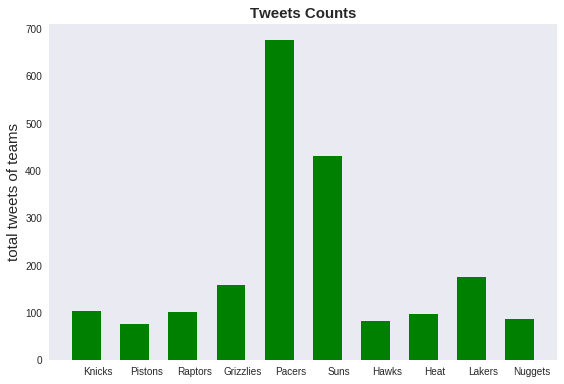

In [24]:
counts =[counts_of_tweets('Knicks',tweets),counts_of_tweets('Pistons',tweets),counts_of_tweets('Raptors',tweets),
        counts_of_tweets('Grizzlies',tweets),counts_of_tweets('Pacers',tweets),counts_of_tweets('Suns',tweets)
        ,counts_of_tweets('Hawks',tweets),counts_of_tweets('Heat',tweets),counts_of_tweets('Lakers',tweets),counts_of_tweets('Nuggets',tweets)]
teams=['Knicks','Pistons','Raptors','Grizzlies','Pacers','Suns','Hawks','Heat','Lakers','Nuggets']

x=[0,1,2,3,4,5,6,7,8,9]
width = 0.6
fig, ax = plt.subplots()
plt.bar(teams, counts, width, alpha=1, color='g')
ax.set_ylabel('total tweets of teams', fontsize=15)
ax.set_title('Tweets Counts', fontsize=15, fontweight='bold')
ax.set_xticks([p + 0.4 * width for p in x])
ax.set_xticklabels(teams)
plt.grid()
plt.tight_layout()
plt.savefig('selected_keywords.jpg',bbox_inches='tight', pad_inches=0.3)
  
#com


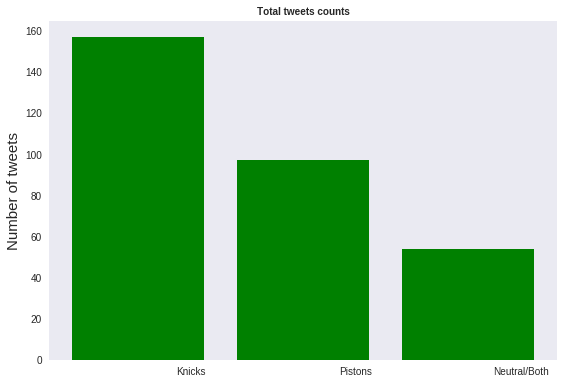

In [25]:
counts_comparesion('Knicks','Pistons')


Knicks: 
total tweets: 157
Positive Tweets: 58, percentage: 36.942675%
Negative Tweets: 26, percentage: 16.560510%
Neutral Tweets: 73, percentage: 46.496815%
Pistons: 
total tweets: 97
Positive Tweets: 30, percentage: 30.927835%
Negative Tweets: 14, percentage: 14.432990%
Neutral Tweets: 53, percentage: 54.639175%


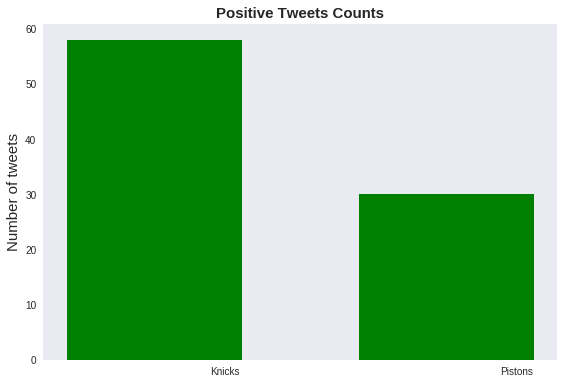

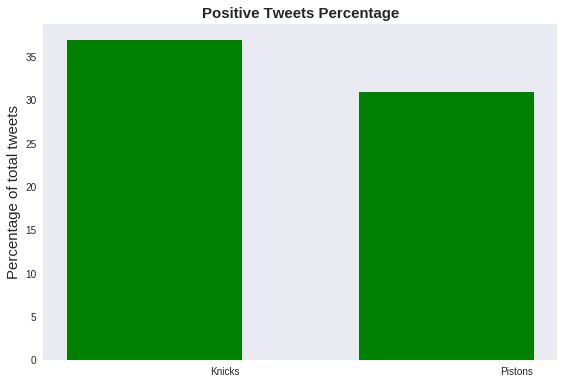

In [26]:
compare_positive('Knicks','Pistons')


Knicks: 
total tweets: 157
Positive Tweets: 58, percentage: 36.942675%
Negative Tweets: 26, percentage: 16.560510%
Neutral Tweets: 73, percentage: 46.496815%
Pistons: 
total tweets: 97
Positive Tweets: 30, percentage: 30.927835%
Negative Tweets: 14, percentage: 14.432990%
Neutral Tweets: 53, percentage: 54.639175%


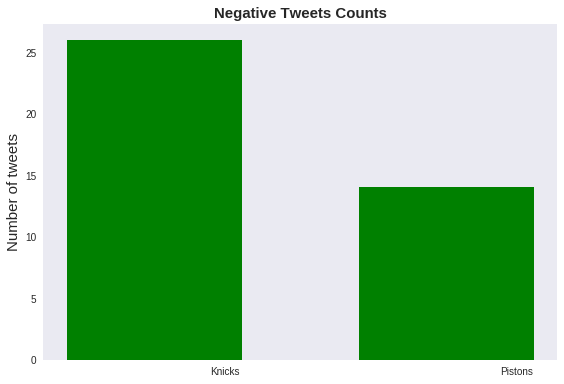

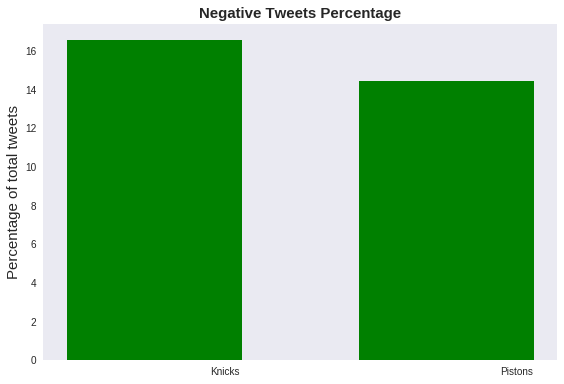

In [27]:
compare_negative('Knicks','Pistons')


Knicks: 
total tweets: 157
Positive Tweets: 58, percentage: 36.942675%
Negative Tweets: 26, percentage: 16.560510%
Neutral Tweets: 73, percentage: 46.496815%
Pistons: 
total tweets: 97
Positive Tweets: 30, percentage: 30.927835%
Negative Tweets: 14, percentage: 14.432990%
Neutral Tweets: 53, percentage: 54.639175%


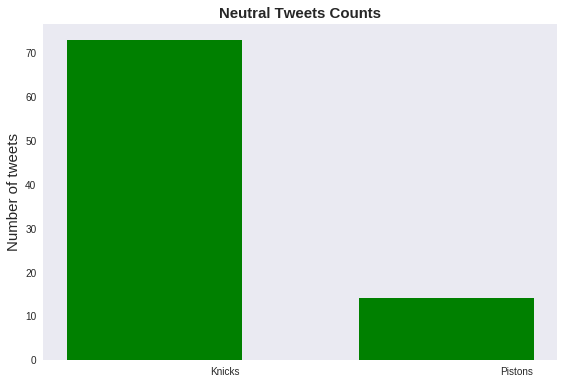

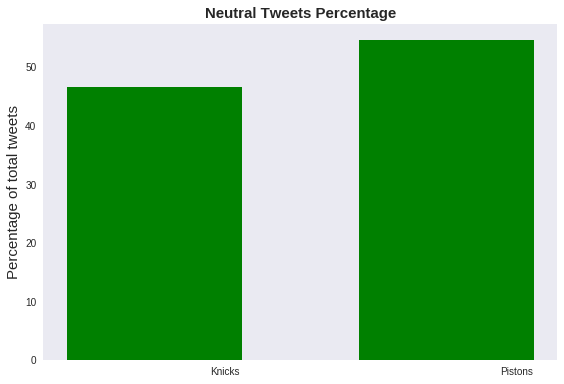

In [28]:
compare_neutral('Knicks','Pistons')

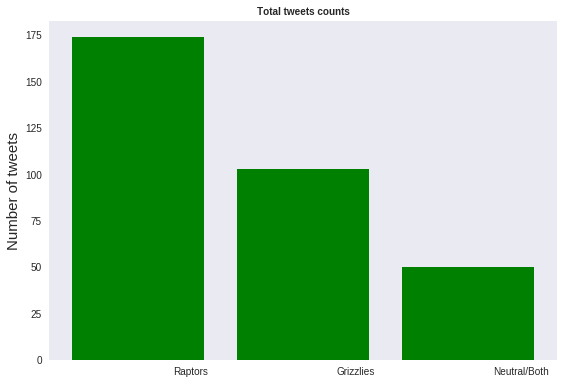

In [29]:
counts_comparesion('Raptors','Grizzlies')


Raptors: 
total tweets: 174
Positive Tweets: 38, percentage: 21.839080%
Negative Tweets: 21, percentage: 12.068966%
Neutral Tweets: 115, percentage: 66.091954%
Grizzlies: 
total tweets: 103
Positive Tweets: 30, percentage: 29.126214%
Negative Tweets: 20, percentage: 19.417476%
Neutral Tweets: 53, percentage: 51.456311%


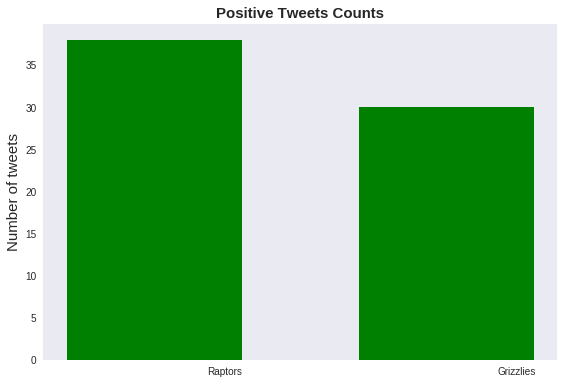

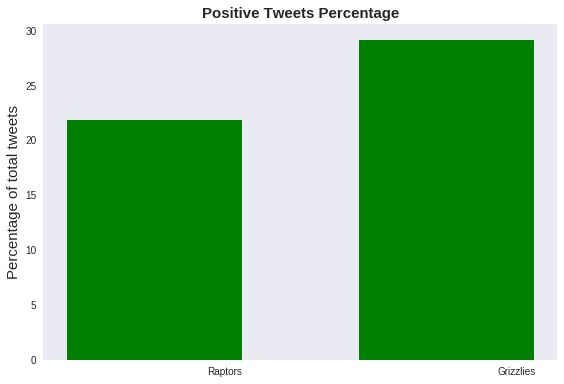

In [30]:
compare_positive('Raptors','Grizzlies')


Raptors: 
total tweets: 174
Positive Tweets: 38, percentage: 21.839080%
Negative Tweets: 21, percentage: 12.068966%
Neutral Tweets: 115, percentage: 66.091954%
Grizzlies: 
total tweets: 103
Positive Tweets: 30, percentage: 29.126214%
Negative Tweets: 20, percentage: 19.417476%
Neutral Tweets: 53, percentage: 51.456311%


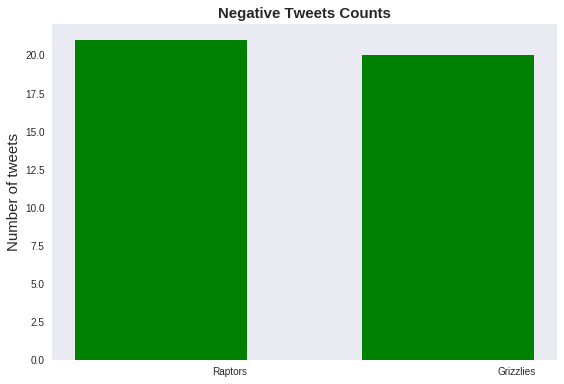

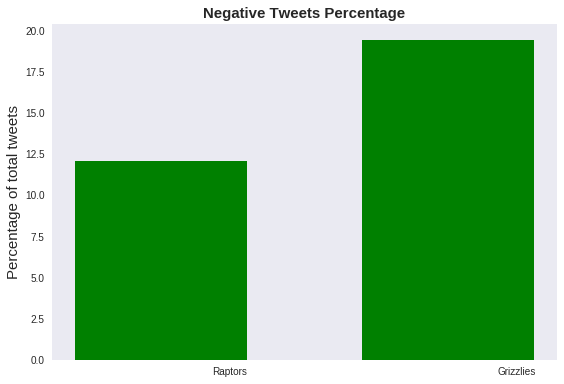

In [31]:
compare_negative('Raptors','Grizzlies')


Raptors: 
total tweets: 174
Positive Tweets: 38, percentage: 21.839080%
Negative Tweets: 21, percentage: 12.068966%
Neutral Tweets: 115, percentage: 66.091954%
Grizzlies: 
total tweets: 103
Positive Tweets: 30, percentage: 29.126214%
Negative Tweets: 20, percentage: 19.417476%
Neutral Tweets: 53, percentage: 51.456311%


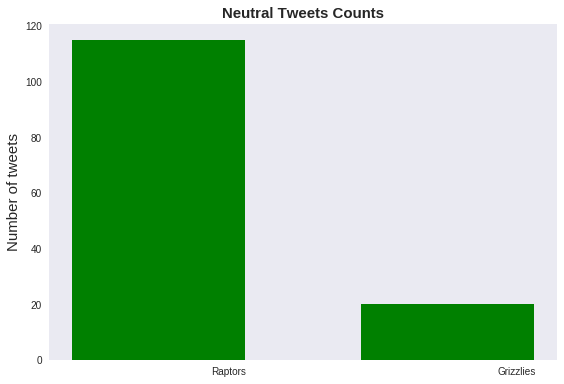

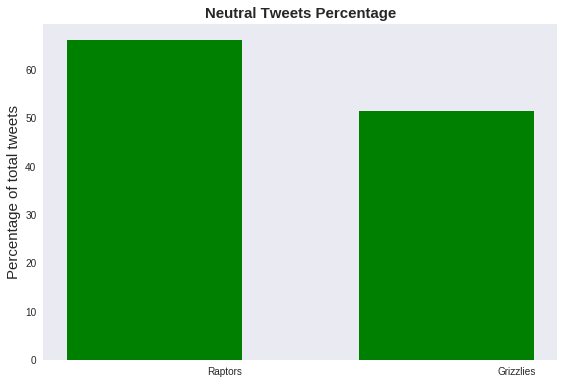

In [32]:
compare_neutral('Raptors','Grizzlies')

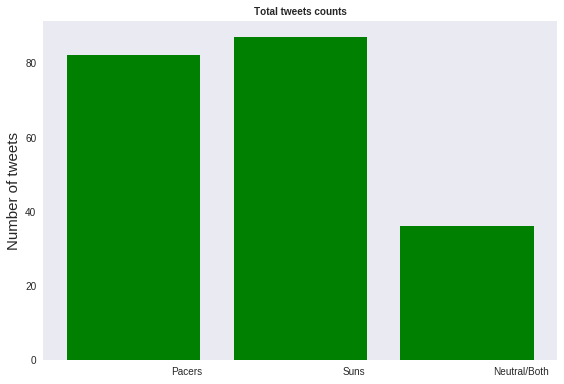

In [33]:
counts_comparesion('Pacers','Suns')




Pacers: 
total tweets: 82
Positive Tweets: 26, percentage: 31.707317%
Negative Tweets: 2, percentage: 2.439024%
Neutral Tweets: 54, percentage: 65.853659%
Suns: 
total tweets: 87
Positive Tweets: 25, percentage: 28.735632%
Negative Tweets: 6, percentage: 6.896552%
Neutral Tweets: 56, percentage: 64.367816%


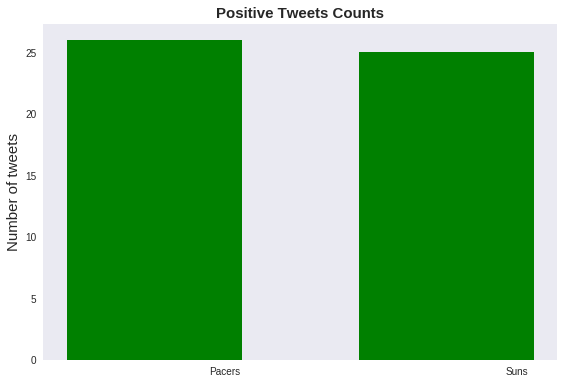

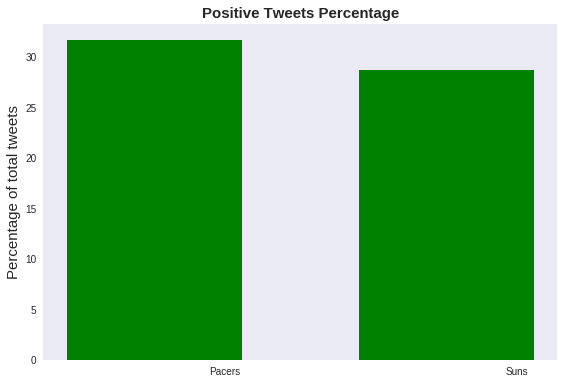

In [34]:
compare_positive('Pacers','Suns')

Pacers: 
total tweets: 82
Positive Tweets: 26, percentage: 31.707317%
Negative Tweets: 2, percentage: 2.439024%
Neutral Tweets: 54, percentage: 65.853659%
Suns: 
total tweets: 87
Positive Tweets: 25, percentage: 28.735632%
Negative Tweets: 6, percentage: 6.896552%
Neutral Tweets: 56, percentage: 64.367816%


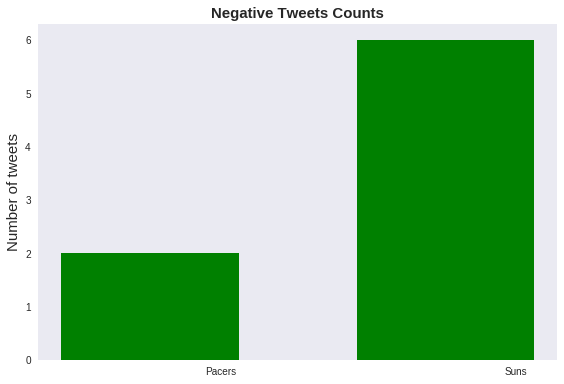

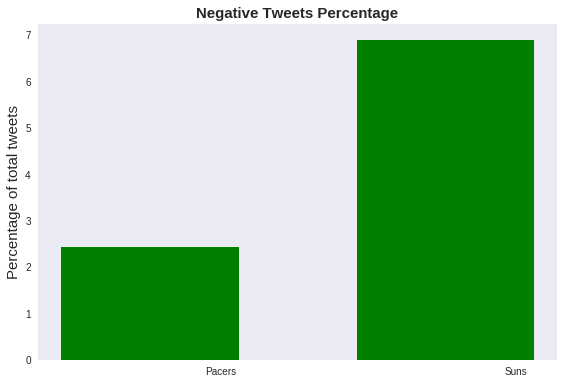

In [35]:
compare_negative('Pacers','Suns')

Pacers: 
total tweets: 82
Positive Tweets: 26, percentage: 31.707317%
Negative Tweets: 2, percentage: 2.439024%
Neutral Tweets: 54, percentage: 65.853659%
Suns: 
total tweets: 87
Positive Tweets: 25, percentage: 28.735632%
Negative Tweets: 6, percentage: 6.896552%
Neutral Tweets: 56, percentage: 64.367816%


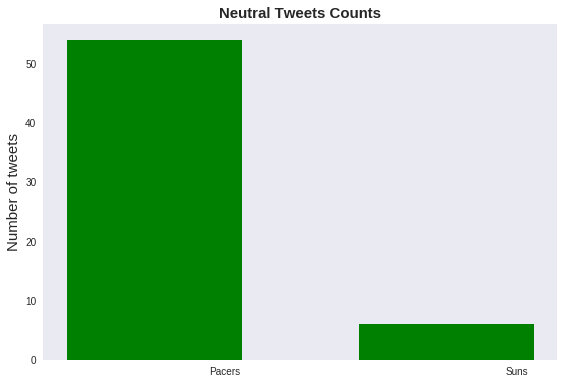

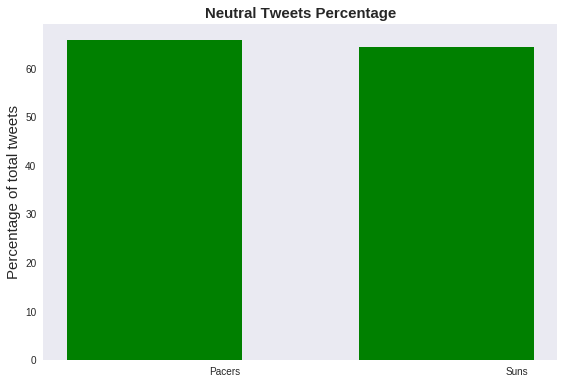

In [36]:
compare_neutral('Pacers','Suns')

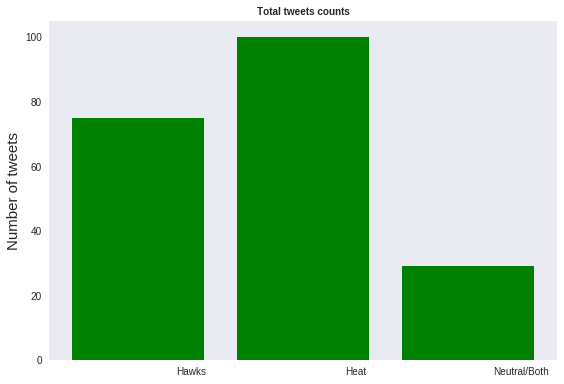

In [37]:
counts_comparesion('Hawks','Heat')

Hawks: 
total tweets: 75
Positive Tweets: 26, percentage: 34.666667%
Negative Tweets: 8, percentage: 10.666667%
Neutral Tweets: 41, percentage: 54.666667%
Heat: 
total tweets: 100
Positive Tweets: 23, percentage: 23.000000%
Negative Tweets: 18, percentage: 18.000000%
Neutral Tweets: 59, percentage: 59.000000%


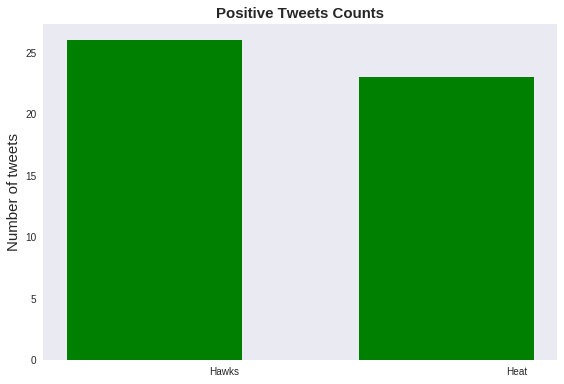

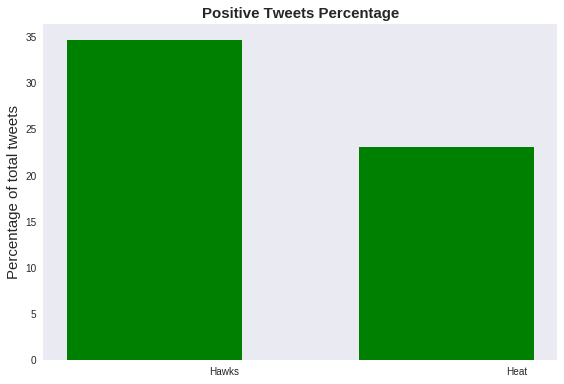

In [38]:

compare_positive('Hawks','Heat')


Hawks: 
total tweets: 75
Positive Tweets: 26, percentage: 34.666667%
Negative Tweets: 8, percentage: 10.666667%
Neutral Tweets: 41, percentage: 54.666667%
Heat: 
total tweets: 100
Positive Tweets: 23, percentage: 23.000000%
Negative Tweets: 18, percentage: 18.000000%
Neutral Tweets: 59, percentage: 59.000000%


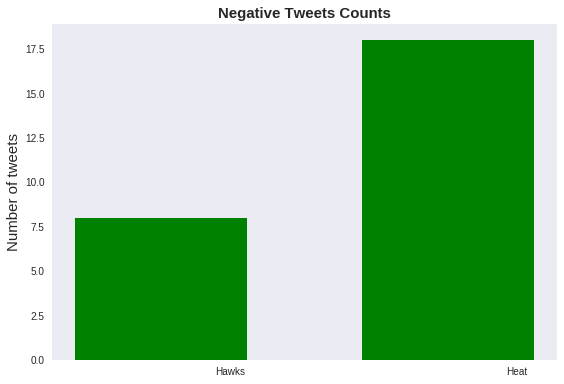

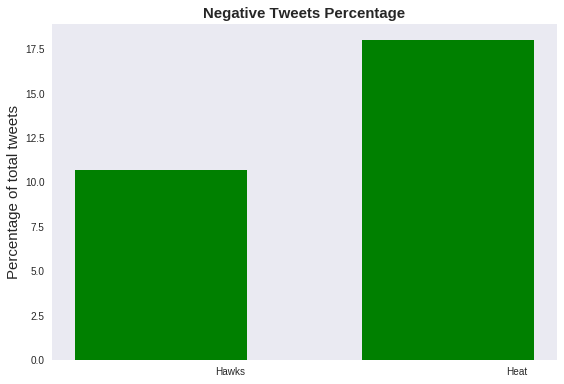

In [39]:
compare_negative('Hawks','Heat')


Hawks: 
total tweets: 75
Positive Tweets: 26, percentage: 34.666667%
Negative Tweets: 8, percentage: 10.666667%
Neutral Tweets: 41, percentage: 54.666667%
Heat: 
total tweets: 100
Positive Tweets: 23, percentage: 23.000000%
Negative Tweets: 18, percentage: 18.000000%
Neutral Tweets: 59, percentage: 59.000000%


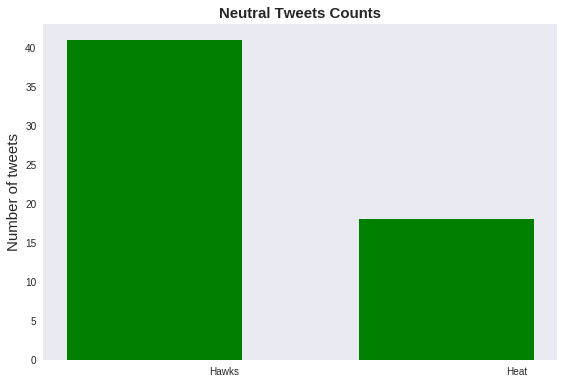

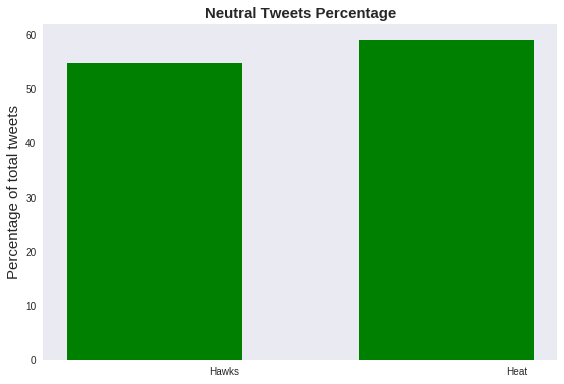

In [40]:
compare_neutral('Hawks','Heat')

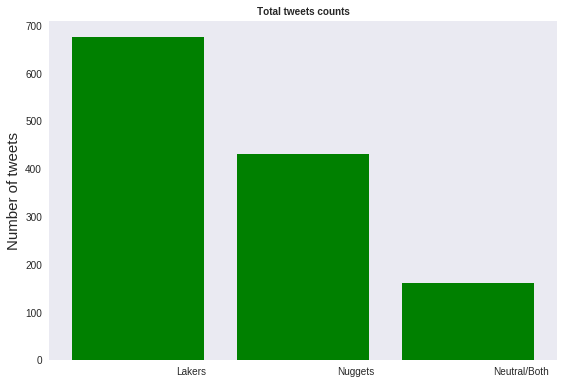

In [41]:
counts_comparesion('Lakers','Nuggets')

Lakers: 
total tweets: 676
Positive Tweets: 283, percentage: 41.863905%
Negative Tweets: 208, percentage: 30.769231%
Neutral Tweets: 185, percentage: 27.366864%
Nuggets: 
total tweets: 431
Positive Tweets: 135, percentage: 31.322506%
Negative Tweets: 28, percentage: 6.496520%
Neutral Tweets: 268, percentage: 62.180974%


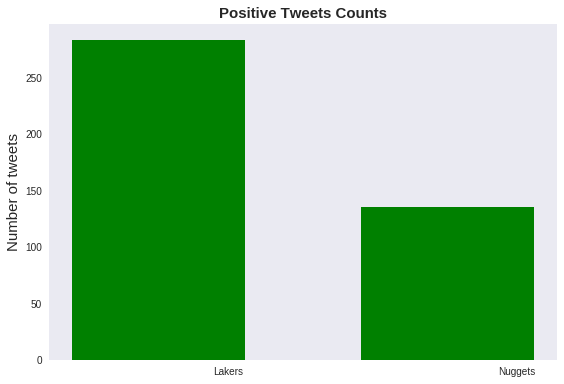

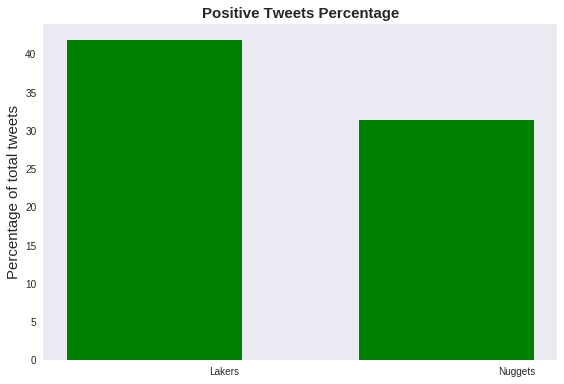

In [42]:
compare_positive('Lakers','Nuggets')

Lakers: 
total tweets: 676
Positive Tweets: 283, percentage: 41.863905%
Negative Tweets: 208, percentage: 30.769231%
Neutral Tweets: 185, percentage: 27.366864%
Nuggets: 
total tweets: 431
Positive Tweets: 135, percentage: 31.322506%
Negative Tweets: 28, percentage: 6.496520%
Neutral Tweets: 268, percentage: 62.180974%


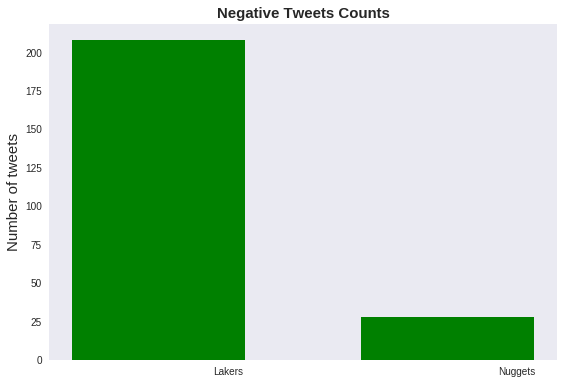

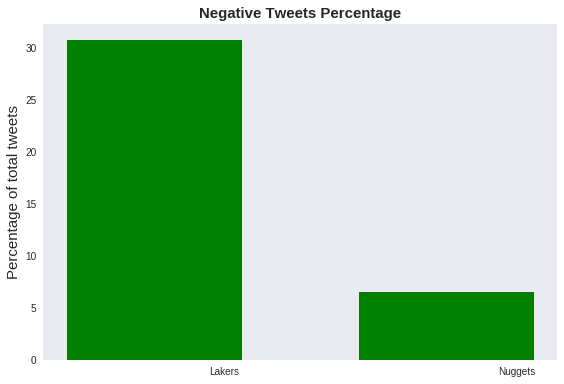

In [43]:
compare_negative('Lakers','Nuggets')

Lakers: 
total tweets: 676
Positive Tweets: 283, percentage: 41.863905%
Negative Tweets: 208, percentage: 30.769231%
Neutral Tweets: 185, percentage: 27.366864%
Nuggets: 
total tweets: 431
Positive Tweets: 135, percentage: 31.322506%
Negative Tweets: 28, percentage: 6.496520%
Neutral Tweets: 268, percentage: 62.180974%


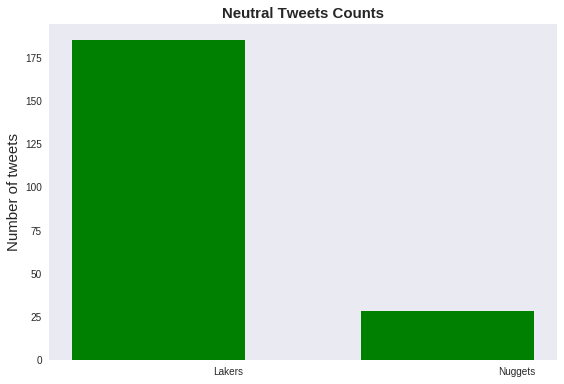

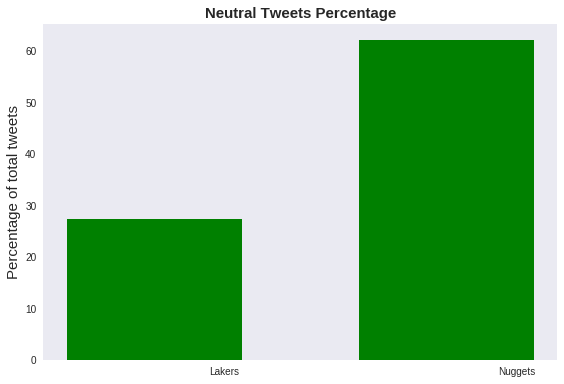

In [44]:
compare_neutral('Lakers','Nuggets')

In [0]:

from nltk.stem.porter import *
def clean_text(team):
  Team = tweets_contain_keyword_case_insenstive(team,tweets)
  Team ['text'] = Team ['text'].str.replace(r'http\S+', " ", case=False)
  Team ['text'] = Team ['text'].str.replace('RT @[\w]*', " ", case=False)
  Team ['text'] = Team ['text'].str.replace('&gt', " ", case=False)
  Team ['text'] = Team ['text'].str.replace("[#,:,@,!,%^&*]", " ", case=False)
  Team ['text'] = Team ['text'].str.replace("www", " ", case=False)
  tokens = Team['text'].apply(lambda x: x.split())
  
  stop_words = set(stopwords.words('english'))

  stemmer = PorterStemmer()
  tokens = tokens.apply(lambda x: [stemmer.stem(i)for i in x])

  for i in range(len(tokens)):
     tokens[i] = ' '.join(tokens[i])

  tokens2 = []
  for w in tokens:
     if w not in stop_words:
          tokens2.append(w)
        
  Team['Tokens'] = tokens
  Team['text'].replace('', np.nan, inplace=True)
  Team.dropna(subset=['text'], inplace=True)

  return Team['Tokens']
  
  
#clean_text('Rockets')

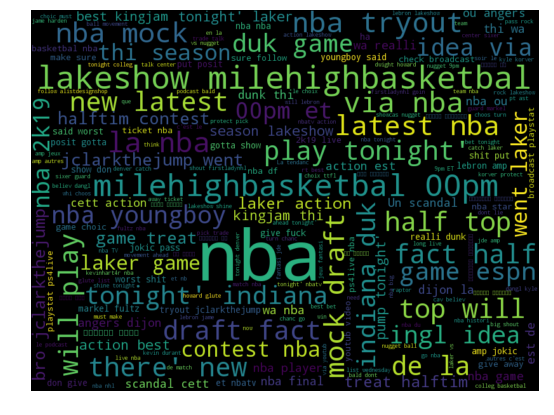

In [46]:
def wordcloud_pic(team):
  cleaned=clean_text(team)
  all_words = ' '.join([text for text in cleaned])
  wordcloud = WordCloud(width=800, 
                      height=600, 
                      random_state=21, 
                      max_font_size=110).generate(all_words)

  plt.figure(figsize=(10, 7))
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis('off')
  plt.show()
  
wordcloud_pic('NBA')  

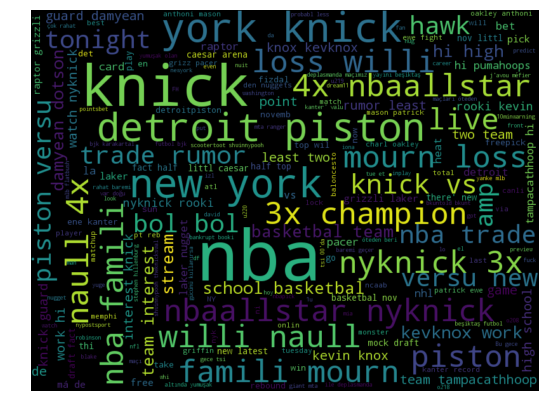

In [47]:
wordcloud_pic("Knicks")

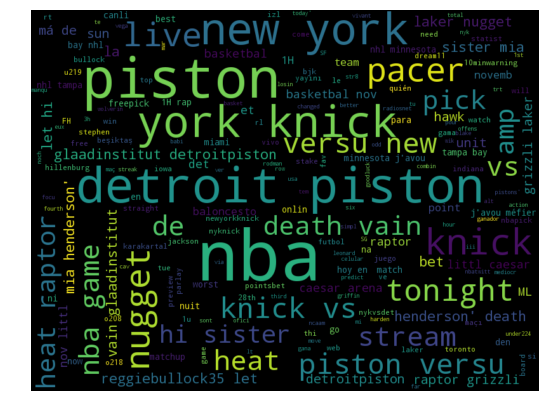

In [48]:
wordcloud_pic("Pistons")

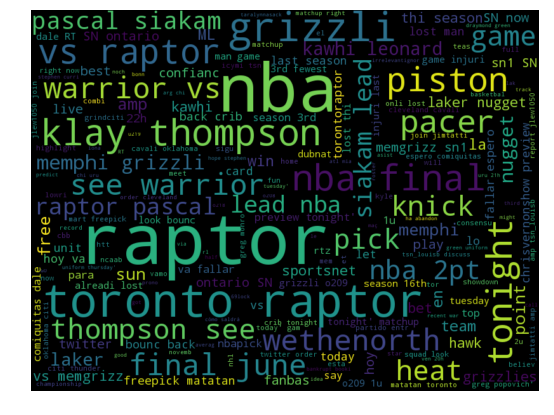

In [49]:
wordcloud_pic("Raptors")


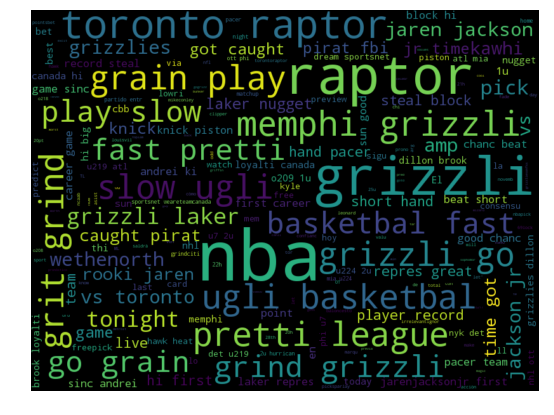

In [50]:
wordcloud_pic("Grizzlies")

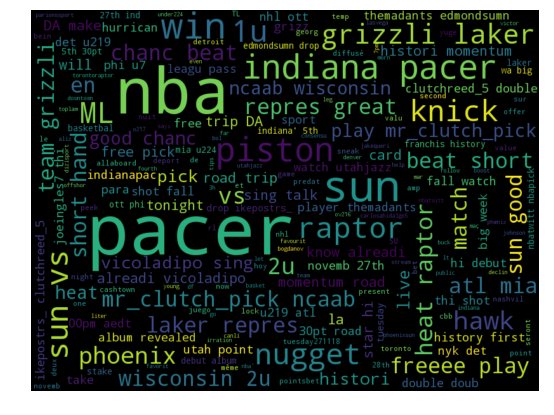

In [51]:
wordcloud_pic("Pacers")

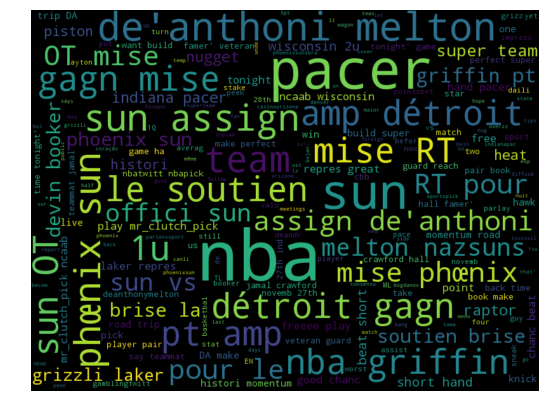

In [52]:
wordcloud_pic("Suns")

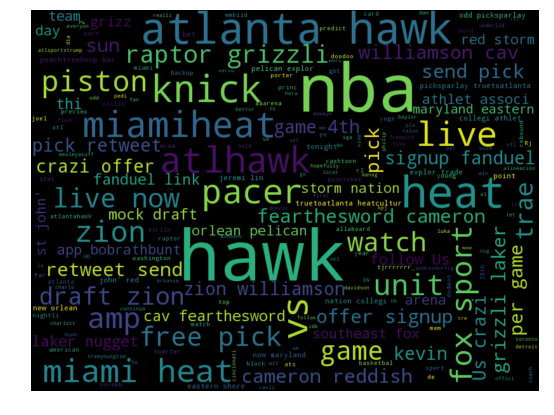

In [53]:
wordcloud_pic("Hawks")

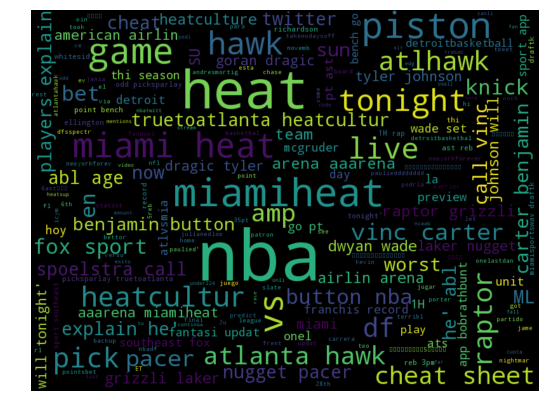

In [54]:

wordcloud_pic("Heat")

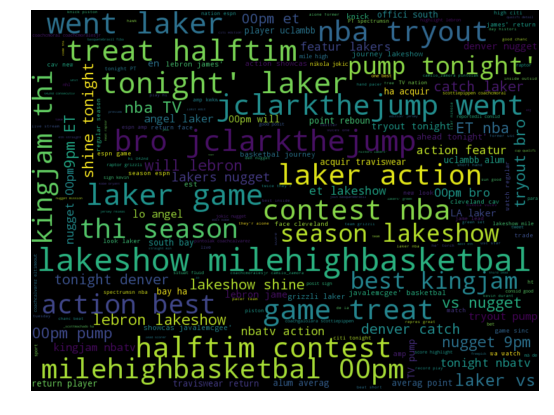

In [55]:
wordcloud_pic("Lakers")

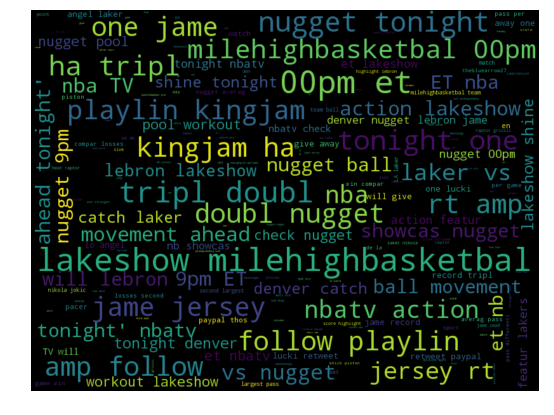

In [56]:
wordcloud_pic("Nuggets")